In [1]:
import pyspark

In [7]:
from pyspark.sql import SparkSession

In [9]:
spark = SparkSession.builder \
    .appName("ProjetoFinal1") \
    .config("spark.driver.bindAddress", "127.0.0.1") \
    .getOrCreate()

24/10/23 21:06:39 WARN SparkContext: Another SparkContext is being constructed (or threw an exception in its constructor). This may indicate an error, since only one SparkContext should be running in this JVM (see SPARK-2243). The other SparkContext was created at:
org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.lang.reflect.Constructor.newInstance(Constructor.java:423)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.ClientServ

In [10]:
# Carregar o arquivo CSV em um DataFrame 
df = spark.read.option("header", "true").csv("/Users/tiagosilva/Air_Traffic_Passenger_Statistics.csv")

# Visualizar os primeiros registros
df.show(5)

+---------------+-----------------+---------------------------+-----------------+---------------------------+-------------+----------+------------------+-------------------+----------+-------------+---------------+---------------------------+------------------------+----+-----+
|Activity Period|Operating Airline|Operating Airline IATA Code|Published Airline|Published Airline IATA Code|  GEO Summary|GEO Region|Activity Type Code|Price Category Code|  Terminal|Boarding Area|Passenger Count|Adjusted Activity Type Code|Adjusted Passenger Count|Year|Month|
+---------------+-----------------+---------------------------+-----------------+---------------------------+-------------+----------+------------------+-------------------+----------+-------------+---------------+---------------------------+------------------------+----+-----+
|         200507|     ata airlines|                         tz|     ata airlines|                         tz|     domestic|        us|          deplaned|          

In [11]:
# Contar companhias aéreas distintas
df.select("Operating Airline").distinct().count()

77

In [13]:
import matplotlib.pyplot as plt

In [34]:
import pandas as pd

+--------------------+--------------------+
|   Operating Airline|avg(Passenger Count)|
+--------------------+--------------------+
|     airtran airways|  10569.238938053097|
|     alaska airlines|  17251.637816245006|
|                taca|   5066.197674418605|
|      china airlines|    9857.51550387597|
|  all nippon airways|   6385.523255813953|
|american eagle ai...|  4006.5283018867926|
|      boeing company|                18.0|
|miami air interna...|             107.375|
|     belair airlines|   415.3636363636364|
|          aeromexico|   5463.822222222222|
|evergreen interna...|                 2.0|
|           air china|   6618.335907335907|
|      etihad airways|   6476.088235294118|
|lufthansa german ...|   19301.96511627907|
|     asiana airlines|   5902.961240310077|
|  singapore airlines|  14746.647286821706|
|       swissport usa|               258.6|
|          icelandair|              2799.7|
|    independence air|              6391.3|
|      atlas air, inc|          

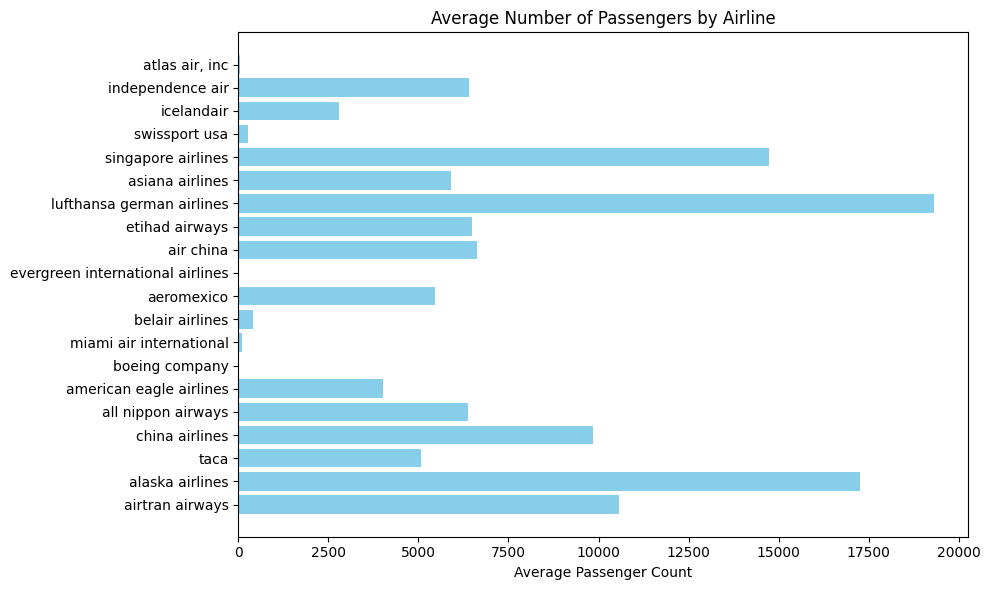

In [33]:
# Calcular a média de passageiros por companhia aérea
media1 = df.groupBy("Operating Airline").agg({"Passenger Count": "avg"}) 

media1.show()

# Calcular a média de passageiros por companhia aérea
media = df.groupBy("Operating Airline").agg({"Passenger Count": "avg"}).toPandas()

# Criar gráfico com os 20 principais
media_top20 = media.head(20)

plt.figure(figsize=(10, 6))
plt.barh(media_top20['Operating Airline'], media_top20['avg(Passenger Count)'], color="skyblue")
plt.xlabel("Average Passenger Count")
plt.title("Average Number of Passengers by Airline")
plt.tight_layout()

# Exibir gráfico
plt.show()

In [35]:
import pyspark.sql.functions as F
# Ordenar o DataFrame pela coluna "Região GEO" e "Passageiros" de forma decrescente
df_sorted = df.orderBy("GEO Region", F.desc("Passenger Count"))

# Eliminar duplicados com base na coluna "Região GEO", mantendo o primeiro (que terá o maior número de passageiros)
sem_duplicados = df_sorted.dropDuplicates(["GEO Region"])

# Mostrar o DataFrame final
sem_duplicados.show()

+---------------+--------------------+---------------------------+--------------------+---------------------------+-------------+-------------------+------------------+-------------------+-------------+-------------+---------------+---------------------------+------------------------+----+--------+
|Activity Period|   Operating Airline|Operating Airline IATA Code|   Published Airline|Published Airline IATA Code|  GEO Summary|         GEO Region|Activity Type Code|Price Category Code|     Terminal|Boarding Area|Passenger Count|Adjusted Activity Type Code|Adjusted Passenger Count|Year|   Month|
+---------------+--------------------+---------------------------+--------------------+---------------------------+-------------+-------------------+------------------+-------------------+-------------+-------------+---------------+---------------------------+------------------------+----+--------+
|         200511|      cathay pacific|                         cx|      cathay pacific|             

In [37]:
# Salvar o DataFrame em CSV
media1.write.option("header", "true").csv("/Users/tiagosilva/media")
sem_duplicados.write.option("header", "true").csv("/Users/tiagosilva/sem_duplicados")